## Importing Libraries and data

In [20]:
import pandas as pd 
import numpy as np
import csv
import re
import nltk
import string
import spacy
nlp = spacy.load('en_core_web_sm')

In [21]:
import neattext

In [22]:
data = pd.read_csv('data_cleaned_1.csv')

In [23]:
data.head()

,date,id,content,user,reply_count,retweet_count,likecount,quotecount,ct
0,2021-10-17 04:41:51+00:00,1.449600e+18,@SujibDr Thank Sir for the information. Last d...,https://twitter.com/MrinChemKar,0,0,0,0,thank information predict disastrous
1,2021-10-17 03:17:40+00:00,1.449580e+18,@biswajitmohanty when v hav allowed well entre...,https://twitter.com/amphan_may2020,0,0,0,0,century matter catch drug peddling
2,2021-10-16 15:06:12+00:00,1.449390e+18,"From the cities to the villages, Amphan left B...",https://twitter.com/ishadrita,1,0,1,0,left climate crisis
3,2021-10-16 15:03:42+00:00,1.449390e+18,"What many have mocked as my claim to stardom, ...",https://twitter.com/ishadrita,0,0,5,0,claim stardom believe night life floor apartment
4,2021-10-16 08:31:43+00:00,1.449290e+18,#WorldFoodDay2021 \nIn the cyclone Amphan deva...,https://twitter.com/ri_montu,0,7,17,0,area southwest coast hard food time live price...


In [24]:
data.shape

(51811, 9)

In [25]:
df=data.copy()

## DROP DUPLICATES

In [26]:
df=df.drop_duplicates(subset=['ct'])

In [27]:
data.shape

(51811, 9)

In [28]:
def clean(tweets):
    
    words=['t','fors','go','n','s','r','pa','nearly','shree','statue','kore','yang','naam','ara',
    'bahut','lge','southwest','od','ry','od','making','central','said','eastern','getting',
    'facing','want','taken','reason','came','trying','khan','despite','form','currently',
            'showing','saying','moving','goes','border','gave','according','southern',
            'pronounced','told','general','shown','known','maybe','kore','northern','northeast',
            'chal','paisa','urge','mere','yeah','southwest','father','ways','posted','foot','approach',
            'fo','blo','boro','mo','kalo','pata','bahar','tara','didnt','wasnt','didn','wasn','prabhu',
            'karo','lo','flo','boro','mo','anyby','dari','baar','mone','wala','tormenta','estado','hora',
            'fuerte','hurricane','atlantic','ocean','doesnt','seta','hain','rani','l']

    tweets = tweets.split()

    tweets = ['thank' if i == 'thankfully' else i for i in tweets]
    tweets = ['devastate' if i == 'devastation' else i for i in tweets]
    tweets = ['impact' if i == 'effect' else i for i in tweets]
    tweets = ['impact' if i == 'affect' else i for i in tweets]
    tweets = ['thank' if i == 'thanks' else i for i in tweets]
    tweets = ['intense' if i == 'intensify' else i for i in tweets]
    tweets = ['need' if i == 'needs' else i for i in tweets]
    tweets = ['dsitribute' if i == 'distribution' else i for i in tweets]
    tweets = ['fight' if i == 'fighting' else i for i in tweets]
    tweets = ['leave' if i == 'leaves' else i for i in tweets]
    tweets = ['impact' if i == 'effects' else i for i in tweets]
    tweets = ['flood' if i == 'flooded' else i for i in tweets]
    tweets = ['recover' if i == 'recovery' else i for i in tweets]
    tweets = ['provide' if i == 'provided' else i for i in tweets]
    tweets = ['happen' if i == 'happening' else i for i in tweets]
    tweets = ['wait' if i == 'waiting' else i for i in tweets]
    tweets = ['follow' if i == 'following' else i for i in tweets]
    tweets = ['save' if i == 'saved' else i for i in tweets]
    tweets = ['relate' if i == 'related' else i for i in tweets]
    tweets = ['think' if i == 'thinking' else i for i in tweets]
    tweets = ['concern' if i == 'concerned' else i for i in tweets]
    tweets = ['keep' if i == 'keeping' else i for i in tweets]
    tweets = ['handle' if i == 'handling' else i for i in tweets]
    tweets = ['intense' if i == 'intensification' else i for i in tweets]
    tweets = ['street' if i == 'streets' else i for i in tweets]
    tweets = ['support' if i == 'supporting' else i for i in tweets]
   
    for w in list(tweets):
            if w in words:
                tweets.remove(w)

    
    tweets=" ".join(tweets)

    return tweets






In [29]:

df['ct']=df['ct'].apply(lambda x: clean(x))

In [30]:
df['ct'].head(50)

0                  thank information predict disastrous
1                    century matter catch drug peddling
2                                   left climate crisis
3      claim stardom believe night life floor apartment
4     area coast hard food time live price rice brok...
5                           series world mangrove delta
6     continue enjoy joke duper bumper low nursery c...
7     proudly earn ability earn money house wrongful...
8                 fishing damage rarely insurance story
9     view reach anti awareness vigilance lead preve...
10                                         pandal parto
11    popular commuter service little damage overhea...
12    route close restoration route try best alive s...
13    short term slow onset drought level rise water...
14                     photo remember howling residence
15                                   service worst know
16    secret privacy purpose smart execution learn t...
17    massive exodus short term million largely 

## Removing stopwords


In [31]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])


In [32]:
df['ct'] = df['ct'].apply(lambda x: neattext.remove_stopwords(x))
df['ct'] = df['ct'].apply(lambda x: remove_stopwords(x))

## Stemming or lematization

In [33]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [34]:
df['ct'] = df['ct'].apply(lambda x: lemmatize_words(x))


In [35]:
df['ct']

0                     thank information predict disastrous
1                       century matter catch drug peddling
2                                      left climate crisis
3         claim stardom believe night life floor apartment
4        area coast hard food time live price rice brok...
                               ...                        
51806                           understand produce musical
51807                         fantastic sort gross theater
51808                                 pick pair glass cool
51809                               orchestra listen music
51810                        homework listen music instead
Name: ct, Length: 51811, dtype: object

## Drop Duplicates 2

In [36]:
df=df.drop_duplicates(subset=['ct'])

In [37]:
data.shape

(51811, 9)

## WORDCLOUD

In [38]:
df['ct'].head(50)

0                  thank information predict disastrous
1                    century matter catch drug peddling
2                                   left climate crisis
3      claim stardom believe night life floor apartment
4     area coast hard food time live price rice brok...
5                           series world mangrove delta
6     continue enjoy joke duper bumper low nursery c...
7     proudly earn ability earn money house wrongful...
8                 fishing damage rarely insurance story
9     view reach anti awareness vigilance lead preve...
10                                         pandal parto
11    popular commuter service little damage overhea...
12    route close restoration route try best alive s...
13    short term slow onset drought level rise water...
14                     photo remember howling residence
15                                     service bad know
16    secret privacy purpose smart execution learn t...
17    massive exodus short term million largely 

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

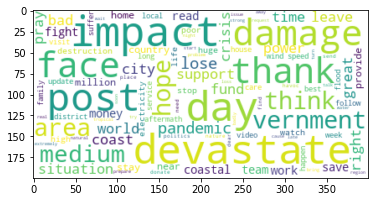

In [40]:
tweet = " ".join(review for review in df.ct)
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,
                          background_color="white").generate(tweet)
plt.imshow(wordcloud_ALL, interpolation='bilinear')
# plt.set_title('All Tweets', fontsize=30)


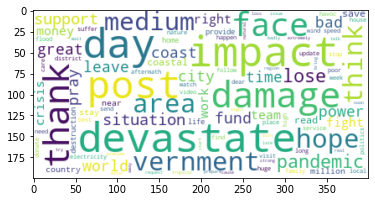

In [41]:
tweet = " ".join(review for review in df.ct)
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,
                          background_color="white").generate(tweet)
plt.imshow(wordcloud_ALL, interpolation='bilinear')
# plt.set_title('All Tweets', fontsize=30)


In [42]:
df['ct']=df['ct'].apply(str)

In [43]:
df['date']=pd.to_datetime(df['date'])

## Data frame to csv

In [44]:
df.to_csv('data_cleaned_2.csv',index = False)